In [6]:
import numpy as np

def quaternion_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1*w2 - x1*x2 - y1*y2 - z1*z2,
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2
    ])
        

def normalize_quaternion(q):
    norm = np.linalg.norm(q)
    if norm == 0:
        return q
    return q / norm


def update_orientation(q, omega, dt):
    omega = rotate_vector(omega,q)
    theta = np.linalg.norm(omega)
    sin_half_theta = np.sin(theta*dt/2)
    dq = np.array([np.cos(theta*dt/2), sin_half_theta*omega[0]/theta, sin_half_theta*omega[1]/theta, sin_half_theta*omega[2]/theta])
    dq = normalize_quaternion(dq)
    q = quaternion_multiply(dq,q)
    q = normalize_quaternion(q)
    return dq, q

        
def rotate_vector(v, q):
    v_quat = np.array([0] + list(v))  # Create a quaternion with zero scalar part
    q_conj = np.array([q[0], -q[1], -q[2], -q[3]])  # Conjugate of q
    v_rotated_quat = quaternion_multiply(quaternion_multiply(q, v_quat), (q_conj))
    return v_rotated_quat[1:]  # Extract the vector part


i = 0
size = 1000
dt = 1/size
n = np.array([0,0,1])

for i in range(size):
    angular_speed = np.array([0,np.pi/2,0])
    if i == 0:
        q = np.array([0,0,0,1])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))


print(n)





[-1.00000000e+00  0.00000000e+00  2.16276649e-15]


In [7]:
print('....................................................................................')
i = 0
for i in range(size):
    angular_speed = np.array([0,np.pi/2,0])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)
i = 0
for i in range(size):
    angular_speed = np.array([np.pi,0,0])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)

for i in range(size):
    angular_speed = np.array([0, np.pi,0])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)

i = 0
for i in range(size):
    angular_speed = np.array([0,0,np.pi])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)

i = 0
for i in range(size):
    angular_speed = np.array([np.pi/2,0,0])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)
i = 0
for i in range(size):
    angular_speed = np.array([0,-np.pi/4,0])
    i += 1
    dq, q = update_orientation(q, angular_speed, dt)
    n = normalize_quaternion(rotate_vector(n, dq))
print(n)

....................................................................................
[-4.60699187e-15  0.00000000e+00 -1.00000000e+00]
[4.00200706e-15 9.19837123e-16 1.00000000e+00]
[-2.82022669e-15 -7.60242563e-16 -1.00000000e+00]
[-3.41697157e-15 -9.19837123e-16 -1.00000000e+00]
[-1.13841228e-15  1.00000000e+00 -3.00584210e-15]
[-7.07106781e-01  7.07106781e-01 -6.10812645e-16]


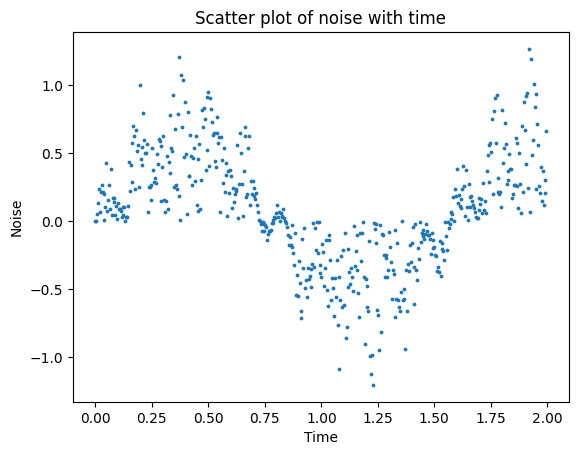

In [8]:
import matplotlib.pyplot as plt
import numpy as np


t = []
noise = []
for time in np.arange(0, 2, 0.004):
    noize = np.random.random() * (np.sin(4 * time) + 0.3 * np.sin(40 * time))
    t.append(time)
    noise.append(noize)

plt.scatter(t, noise, s = 3)
plt.xlabel('Time')
plt.ylabel('Noise')
plt.title('Scatter plot of noise with time')
plt.show()


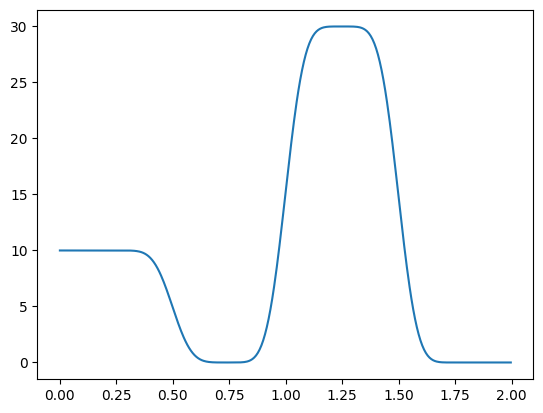

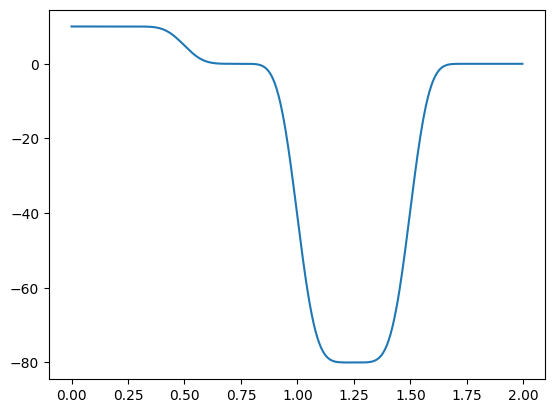

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_orientation_program(dt = 0.004, total_time = 2, duration_of_commands = 0.5, transition_time = 0.1, number_of_smoothing = 2,  *command_tuple):
    total_number_of_data = int(total_time/dt)    
    number_of_commands = len(command_tuple)
    
    rolls = np.zeros(total_number_of_data)
    pitchs = np.zeros(total_number_of_data)


    temps =  [dt*i for i in range(0, total_number_of_data)]


    for index in range(number_of_commands):
        for i, t in enumerate(temps):
            if t < duration_of_commands*index:
                continue
            if (t < duration_of_commands*(index+1)):
                rolls[i] = command_tuple[index][0]
                pitchs[i] = command_tuple[index][1]
            else:
                break

    if transition_time > 0:
        number_of_data_for_transition = int(transition_time/dt)

        for i in range(number_of_smoothing):
            rolls = pd.Series(rolls).rolling(window=number_of_data_for_transition, min_periods=1, center = True).mean()
            pitchs = pd.Series(pitchs).rolling(window=number_of_data_for_transition, min_periods=1, center = True).mean()


    return temps, rolls, pitchs

temp, roll, pitch = create_orientation_program(0.004, 2, 0.5, 0.1, 5, (10,10), (0,0), (30,-80))

plt.plot(temp,roll)
plt.show()

plt.plot(temp,pitch)
plt.show()